In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Classification Tree libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Accuracy Score
from sklearn.metrics import accuracy_score

# AUC
from sklearn import metrics

# Confusion matrix
from sklearn.metrics import confusion_matrix

# Random Forest
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Import data

path = 'C:/Users/herre/OneDrive/Desktop/CML/Tree Models/churn_data.csv'
df = pd.read_csv(path, sep = ';', thousands = ',')

df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [3]:
# Check first few rows of training set
df.head

<bound method NDFrame.head of       Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
0         0           128                1         1       2.70   
1         0           107                1         1       3.70   
2         0           137                1         0       0.00   
3         0            84                0         0       0.00   
4         0            75                0         0       0.00   
...     ...           ...              ...       ...        ...   
3328      0           192                1         1       2.67   
3329      0            68                1         0       0.34   
3330      0            28                1         0       0.00   
3331      0           184                0         0       0.00   
3332      0            74                1         1       3.70   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0                 1    265.1       110           89.0        9.87      10.0  
1        

In [4]:
# Check the number of rows and columns in the training set
df.shape

(3333, 11)

In [5]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [6]:
df.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


## EDA

<AxesSubplot:>

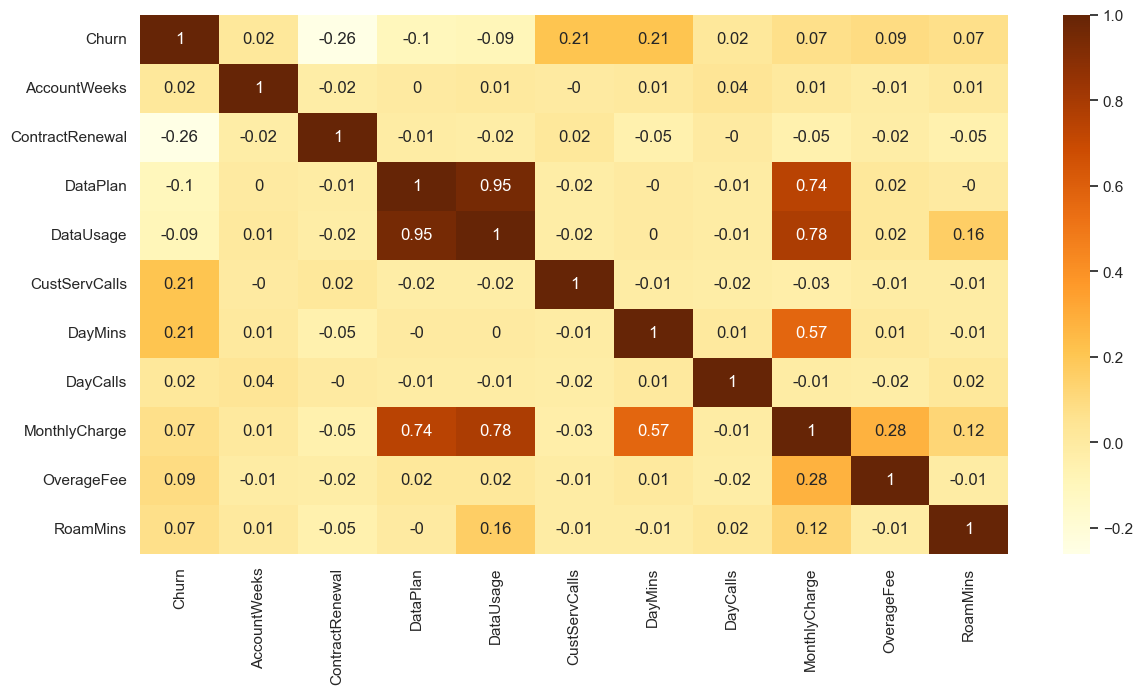

In [7]:
# Check the correlation between variables

sns.set_theme(style="dark")

correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr') 

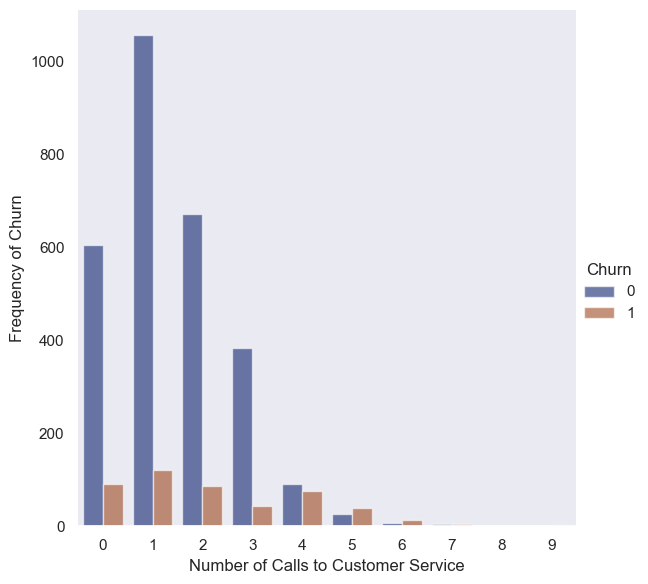

In [8]:
count_df = pd.DataFrame(df.groupby(['CustServCalls', 'Churn']).size())
count_df.columns = ['Frequency']
count_df['Percent'] = count_df / count_df.groupby(level=0).sum()
count_df = count_df.reset_index()

g = sns.catplot(
    data = count_df, kind="bar", 
    x = 'CustServCalls', y = 'Frequency', hue = 'Churn',
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Number of Calls to Customer Service", "Frequency of Churn")
g.legend.set_title("Churn")

[Text(0.5, 0, 'Number of Calls to Customer Service'),
 Text(0, 0.5, 'Percentage of Churns'),
 Text(0.5, 1.0, 'Evolution of Churns')]

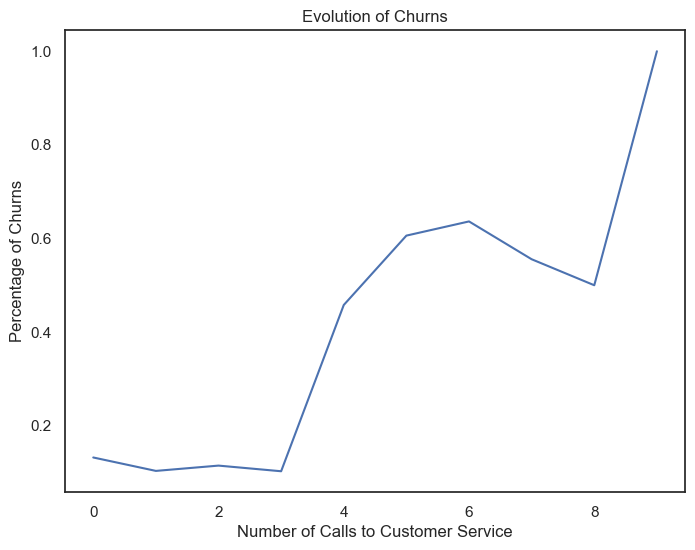

In [9]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.set_theme(style = 'white')

ax = sns.lineplot(x = count_df['CustServCalls'], 
                  y = count_df.loc[count_df['Churn'] == 1]['Percent'], 
                  data = count_df) 

ax.set(xlabel ='Number of Calls to Customer Service', 
       ylabel ='Percentage of Churns',
       title = 'Evolution of Churns')

At about 4 calls, percentage of customers that churn significantly increases (as a proportion of total customers, grouped by the number of calls to customer service)

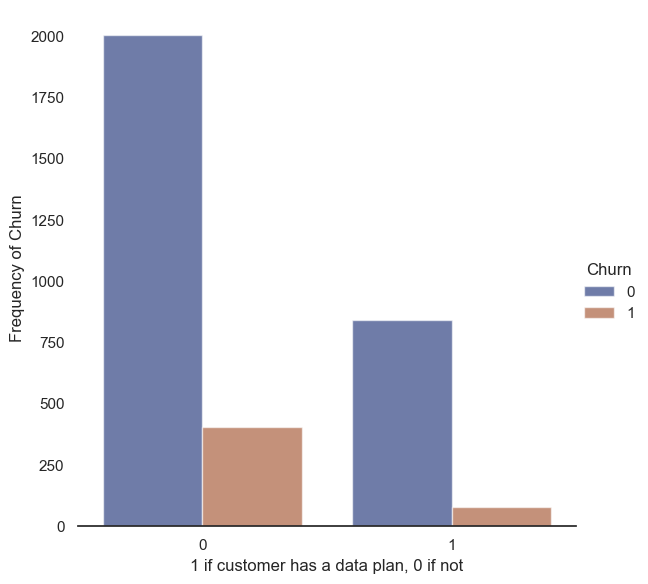

In [10]:
count_df = pd.DataFrame(df.groupby(['DataPlan', 'Churn']).size())
count_df.columns = ['Frequency']
count_df = count_df.reset_index()

g = sns.catplot(
    data = count_df, kind="bar", 
    x = 'DataPlan', y = 'Frequency', hue = 'Churn',
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("1 if customer has a data plan, 0 if not", "Frequency of Churn")
g.legend.set_title("Churn")

Higher percentage of churns if no data plan...

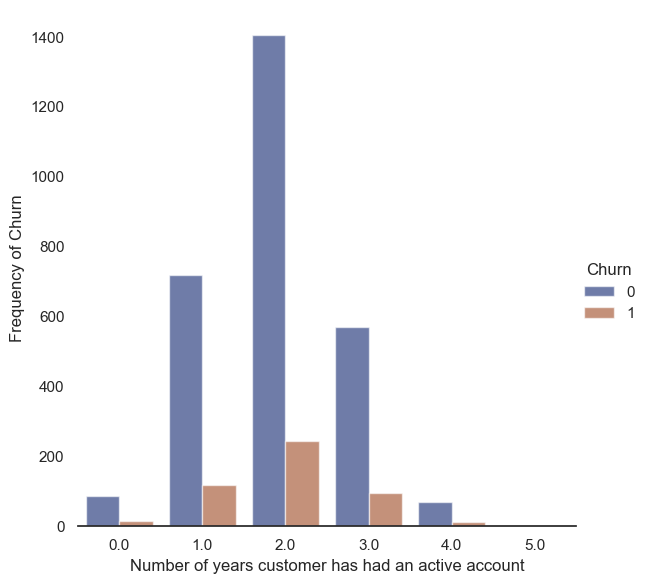

In [11]:
df['AccountYears'] = round(df['AccountWeeks'] / 52)

count_df = pd.DataFrame(df.groupby(['AccountYears', 'Churn']).size())
count_df.columns = ['Frequency']
count_df['Percent'] = count_df / count_df.groupby(level=0).sum()
count_df = count_df.reset_index()

g = sns.catplot(
    data = count_df, kind="bar", 
    x = 'AccountYears', y = 'Frequency', hue = 'Churn',
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Number of years customer has had an active account", "Frequency of Churn")
g.legend.set_title("Churn")

[Text(0.5, 0, 'Number of Months Account has been Active'),
 Text(0, 0.5, 'Percentage of Churns'),
 Text(0.5, 1.0, 'Evolution of Churns')]

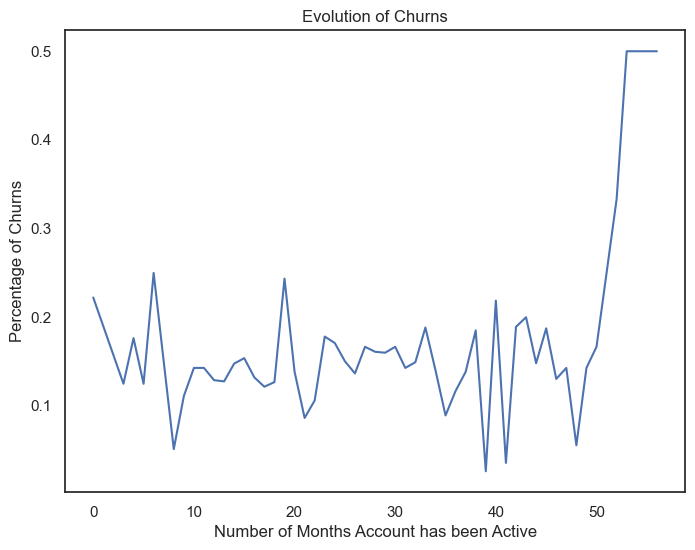

In [12]:
df['AccountMonths'] = round(df['AccountWeeks'] / 4)

count_df = pd.DataFrame(df.groupby(['AccountMonths', 'Churn']).size())
count_df.columns = ['Frequency']
count_df['Percent'] = count_df / count_df.groupby(level=0).sum()
count_df = count_df.reset_index()

sns.set(rc = {'figure.figsize':(8,6)})
sns.set_theme(style = 'white')

ax = sns.lineplot(x = count_df['AccountMonths'], 
                  y = count_df.loc[count_df['Churn'] == 1]['Percent'], 
                  data = count_df) 

ax.set(xlabel ='Number of Months Account has been Active', 
       ylabel ='Percentage of Churns',
       title = 'Evolution of Churns')

No significant trends observed, althought churn percentage skyrockets at ~48 months

[Text(0.5, 0, 'Churn'), Text(0, 0.5, 'Average Daytime Minutes Per Month)')]

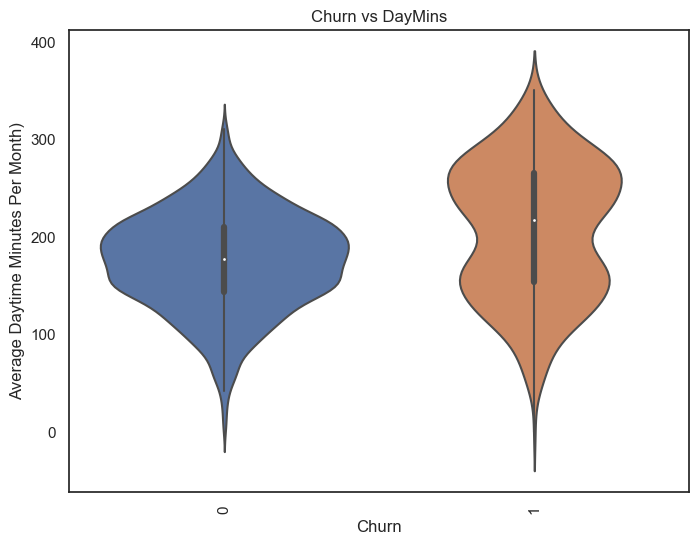

In [13]:

sns.set(rc = {'figure.figsize':(8,6)})
sns.set_theme(style = 'white')

ax = sns.violinplot(x = "Churn", 
                    y = "DayMins",
                    data = df)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

ax.set_title("Churn vs DayMins")

ax.set(xlabel ='Churn', 
       ylabel ='Average Daytime Minutes Per Month)')

Different distributions for churns

<AxesSubplot:xlabel='DayMins', ylabel='OverageFee'>

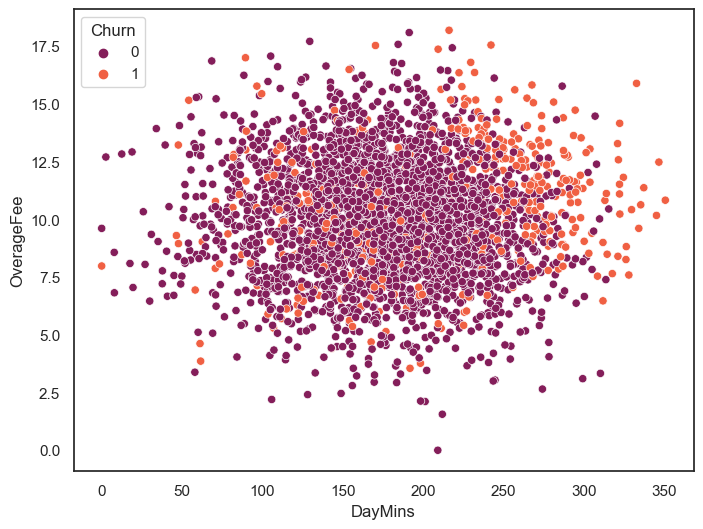

In [14]:
sns.scatterplot(data = df, 
                y = df['OverageFee'], 
                x = df['DayMins'] , 
                hue = 'Churn', 
                palette = 'rocket')


Huge concentration of churn in northeast of graph.. High overage fee due to high daymins? --

<AxesSubplot:xlabel='DayMins', ylabel='MonthlyCharge'>

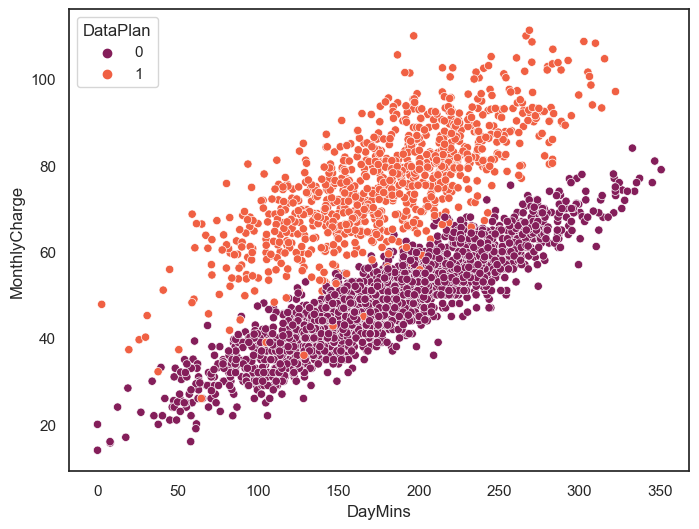

In [15]:
sns.scatterplot(data = df, 
                y = df['MonthlyCharge'], 
                x = df['DayMins'] , 
                hue = 'DataPlan', 
                palette = 'rocket')

Two different distributions for having a data plan vs not. Monthly charge highly correlated with day mins... what drives overage fees?? especially for nondata plan users??

## Feature Engineering

<AxesSubplot:xlabel='DayMins', ylabel='BaseFeePct'>

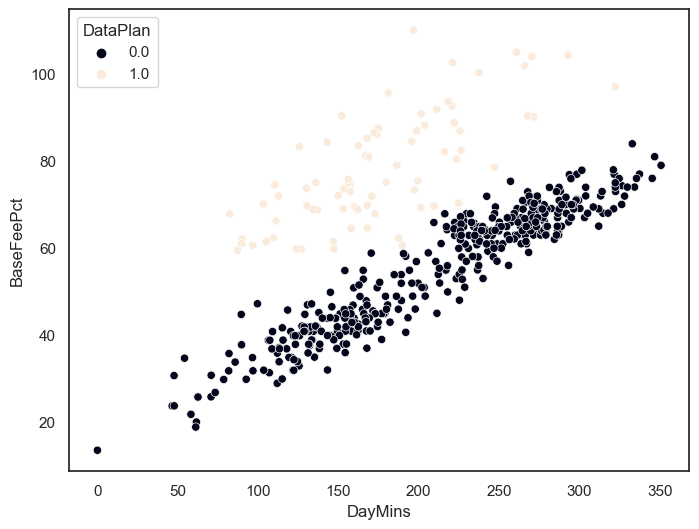

In [16]:
# Assuming Monthly Charge and Overage Fee are comparable (Base Fee + Overage Fee = Monthly Charge)
# Although not necessarily accurate.. Monthly Charge is an average vs Overage Fee is a point in time metric (?)

df['BaseFeePct'] = df['MonthlyCharge'] - df['OverageFee'] / df['MonthlyCharge']

sns.scatterplot(data = df.loc[df['Churn'] == 1], 
                y = df['BaseFeePct'], 
                x = df['DayMins'] , 
                hue = 'DataPlan', 
                palette = 'rocket')

Those with a data plan pay a lower "Base Fee" as a percentage of their total 

<AxesSubplot:xlabel='MinPerCall', ylabel='MonthlyCharge'>

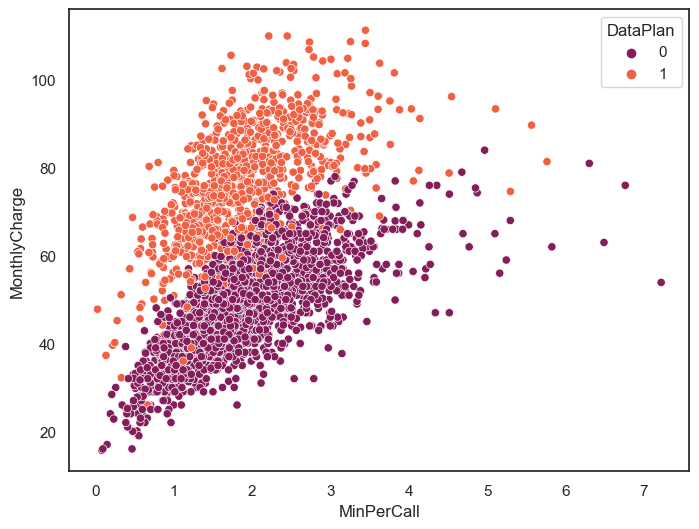

In [17]:
df['MinPerCall'] = df['DayMins'] / df['DayCalls']

sns.scatterplot(data = df, 
                y = df['MonthlyCharge'], 
                x = df['MinPerCall'] , 
                hue = 'DataPlan', 
                palette = 'rocket')

In [18]:
df = df.dropna()

df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,AccountYears,AccountMonths,BaseFeePct,MinPerCall
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0,2.0,32.0,88.889101,2.410000
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7,2.0,27.0,81.880732,1.313821
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2,3.0,34.0,51.883462,2.135088
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6,2.0,21.0,56.945614,4.216901
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1,1.0,19.0,40.819024,1.475221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9,4.0,48.0,71.549651,2.028571
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6,1.0,17.0,56.264007,4.054386
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1,1.0,7.0,55.742143,1.658716
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0,4.0,46.0,49.840400,2.036190


## Preliminary Predictive Analysis: Classification Tree

In [19]:
# Prepare data

X = df.drop('Churn', axis = 1)
y = df['Churn']

seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

X_train.shape

(2664, 14)

In [20]:
# Classification tree

# Train the model using DecisionTree classifier
clf_tree = DecisionTreeClassifier(max_depth = 5, random_state = seed)
clf_tree.fit(X_train, y_train)

# Predict test set labels
y_pred = clf_tree.predict(X_test)


In [21]:
# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.92


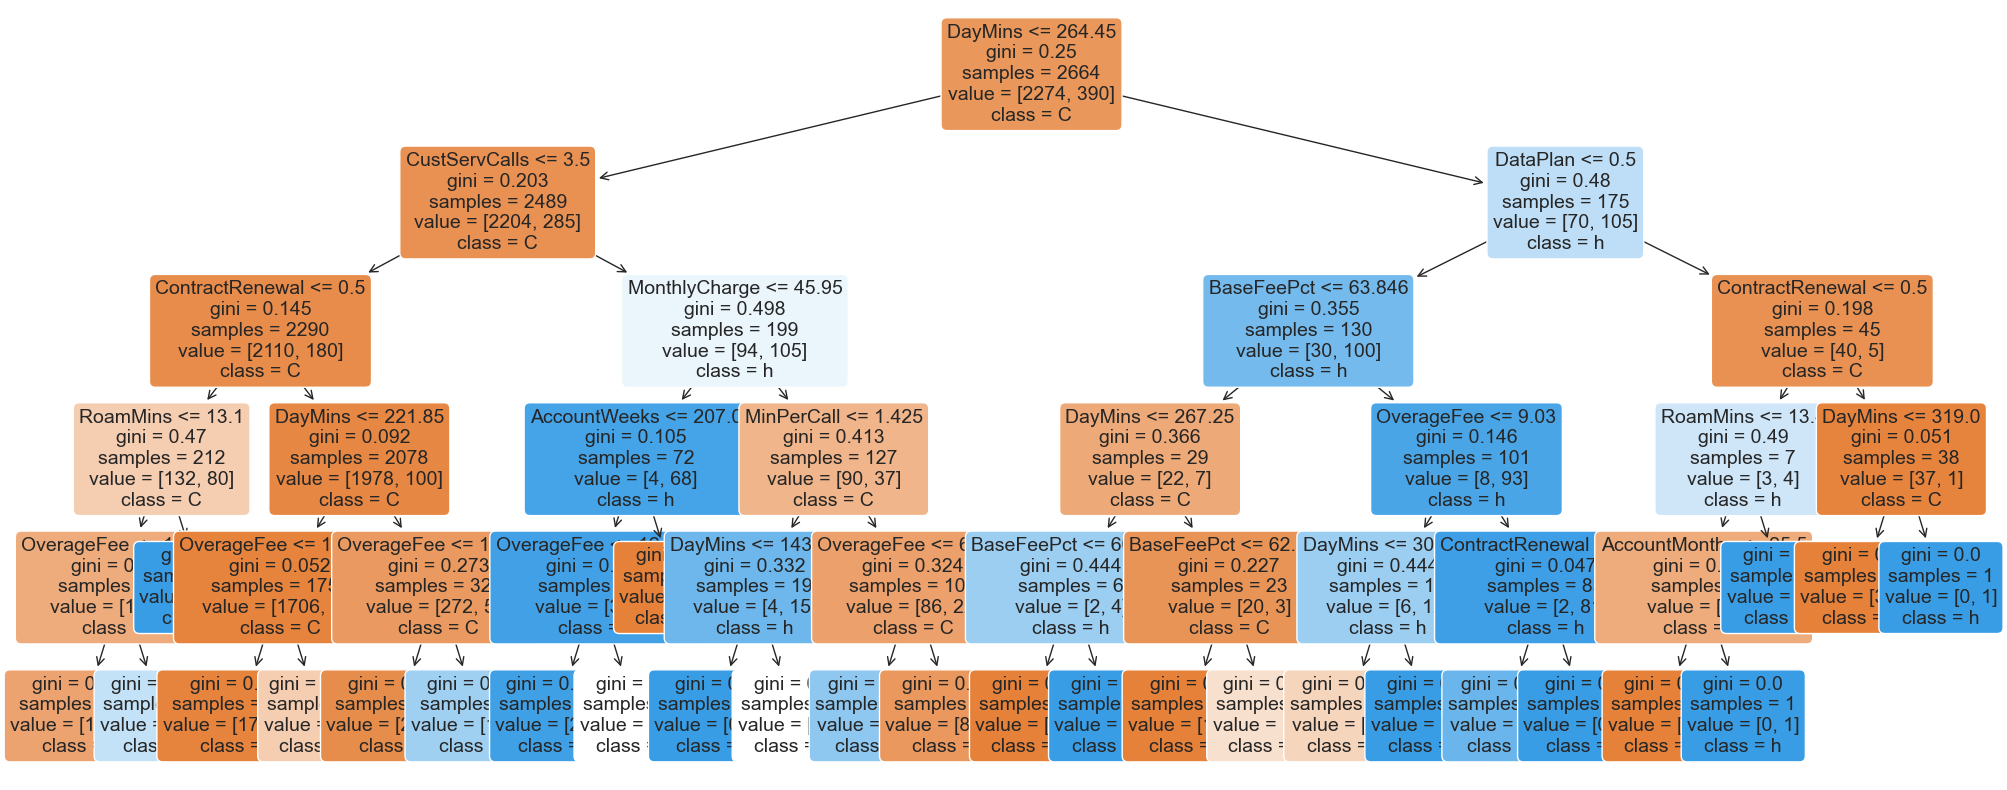

In [22]:

plt.figure(figsize=(25,10))
plot_model = plot_tree(clf_tree,
                      feature_names = X.columns, 
                      class_names = y.name, 
                      filled=True, 
                      rounded=True, 
                      fontsize=14)

Tree splits at about 192 Active Account Weeks or 48 Months, consistent with graph shown above...

### Tree Model with Hyperparameter Tuning

In [23]:
# Hyperparameter Tuning Function

def hp_model(model, parameters, X_train, X_test, y_train):
    
    random_estimator = RandomizedSearchCV(estimator = model,
                                          param_distributions = parameters,
                                          cv = 5,
                                          verbose = True,
                                          random_state = seed,
                                          n_jobs = -1)
    
    random_estimator.fit(X_train, y_train)

    print ('Best Estimator: ', random_estimator.best_estimator_, ' \n')

    chosen_model = random_estimator.best_estimator_
    chosen_model.fit(X_train, y_train)
    
    y_pred = chosen_model.predict(X_test)
    
    return chosen_model, y_pred

In [24]:
# Plot Model Function

def plot_model_(model, X, y):
    
    plt.figure(figsize=(25,10))
    plot_model = plot_tree(model,
                          feature_names = X.columns, 
                          class_names = y.name, 
                          filled = True, 
                          rounded = True, 
                          fontsize = 14)

In [25]:
# Model Evaluation Function

def evaluate_model(model, y_test, y_pred):
    print(f'Train set accuracy: {tree_model.score(X_train, y_train):.2f}')
    print(f'Test set accuracy: {tree_model.score(X_test, y_test):.2f}')

    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)

    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()


In [26]:
parameters = {'criterion': ('gini', 'entropy'),
             'max_depth' : (3,4,5,6,7,8,9,10,11),
             'max_features' : ('auto', 'sqrt', 'log2'),
             'min_samples_split' : (2,4,6)} 

tree_model, y_pred_tree = hp_model(DecisionTreeClassifier(), parameters, X_train, X_test, y_train)

tree_model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Estimator:  DecisionTreeClassifier(max_depth=7, max_features='log2', min_samples_split=6)  



DecisionTreeClassifier(max_depth=7, max_features='log2', min_samples_split=6)

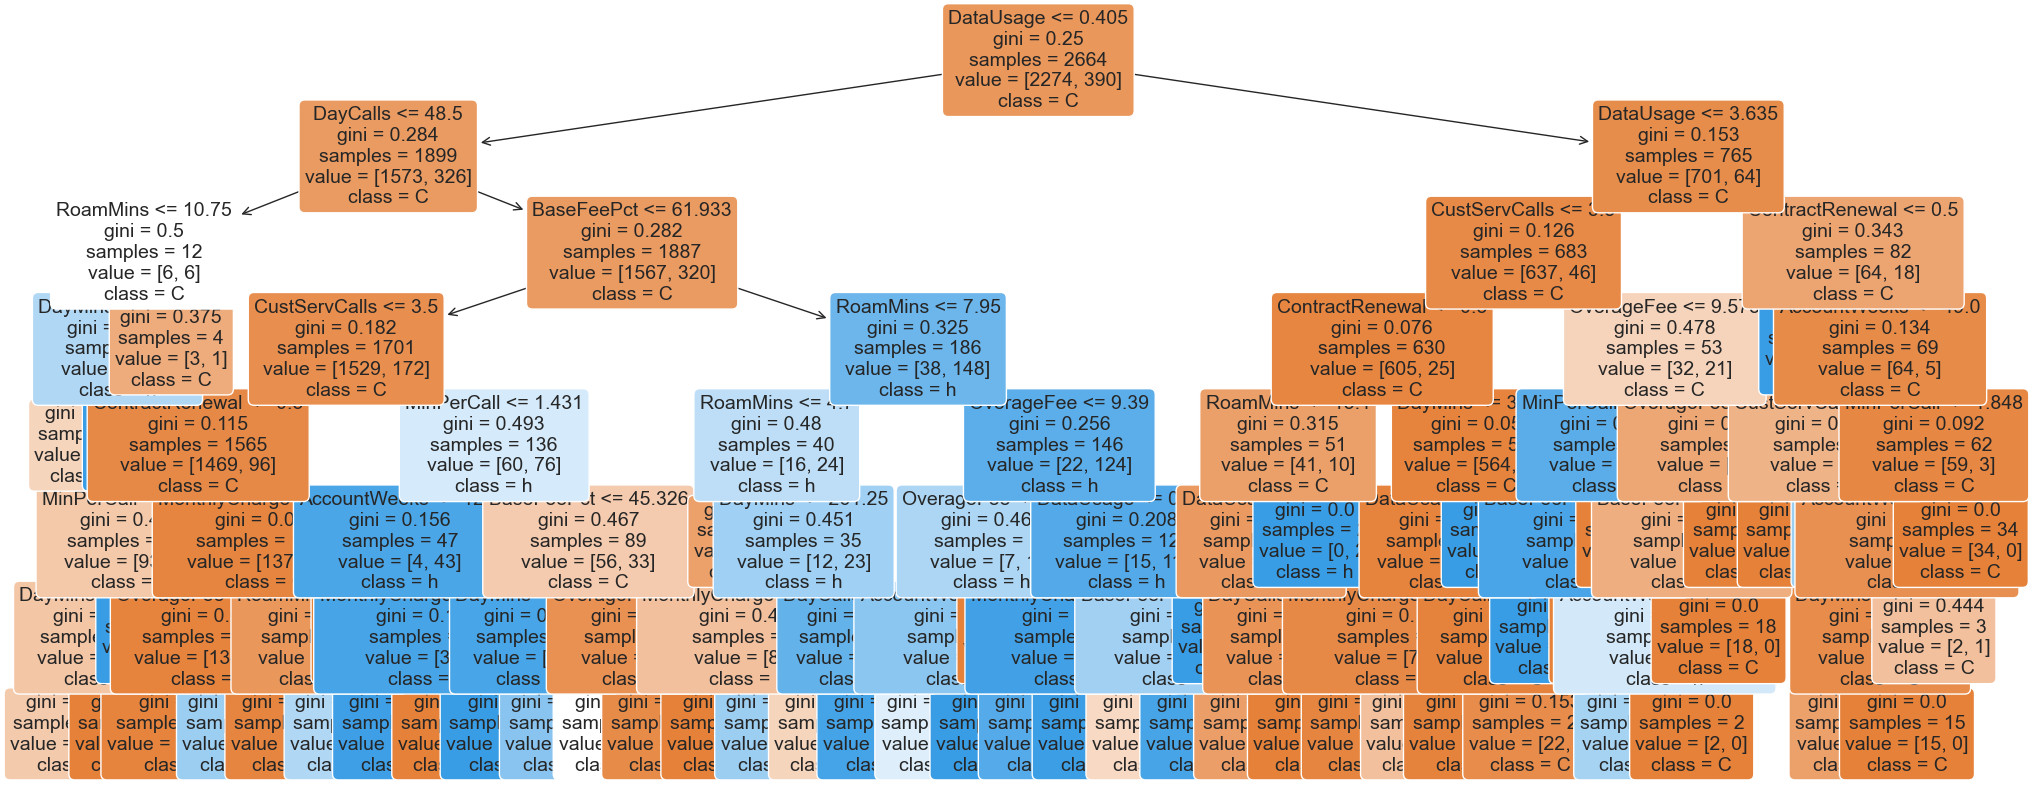

In [27]:
plot_model_(tree_model, X, y)

Train set accuracy: 0.94
Test set accuracy: 0.92


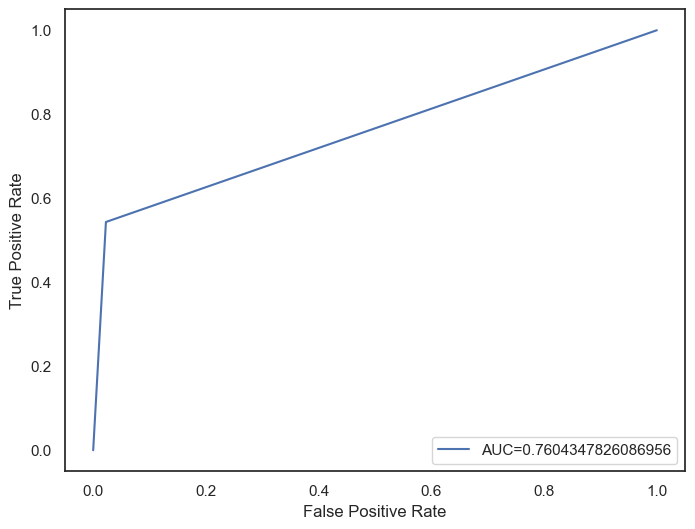

In [28]:
evaluate_model(tree_model, y_test, y_pred_tree)

<AxesSubplot:>

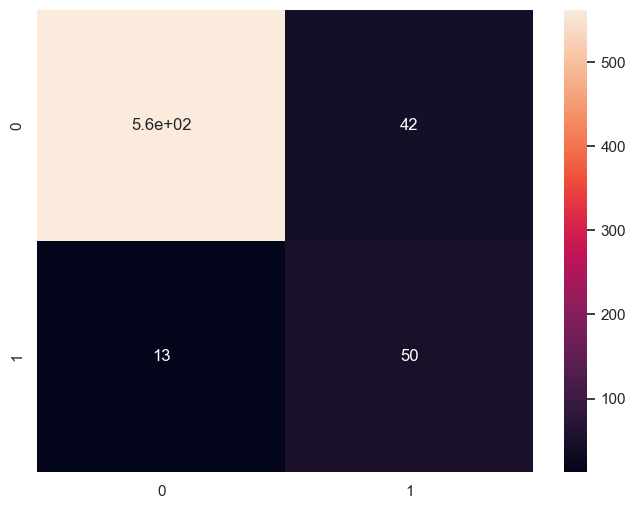

In [29]:
# confusion matrix
cf_mat = confusion_matrix(y_pred_tree, y_test)
sns.heatmap(cf_mat, annot=True)

## Random Forest

In [30]:
parameters = {'n_estimators': [5,20,50,100],
              'max_features': ['auto', 'sqrt'],
              'max_depth': [int(x) for x in np.linspace(10, 120, num = 12)],
              'min_samples_split': [2, 6, 10],
              'min_samples_leaf': [1, 3, 4],
              'bootstrap': [True, False]}

rf_model, y_pred_rf = hp_model(RandomForestRegressor(), parameters, X_train, X_test, y_train)

rf_model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Estimator:  RandomForestRegressor(max_depth=40, max_features='auto', min_samples_leaf=3,
                      min_samples_split=6)  



RandomForestRegressor(max_depth=40, max_features='auto', min_samples_leaf=3,
                      min_samples_split=6)

Train set accuracy: 0.94
Test set accuracy: 0.92


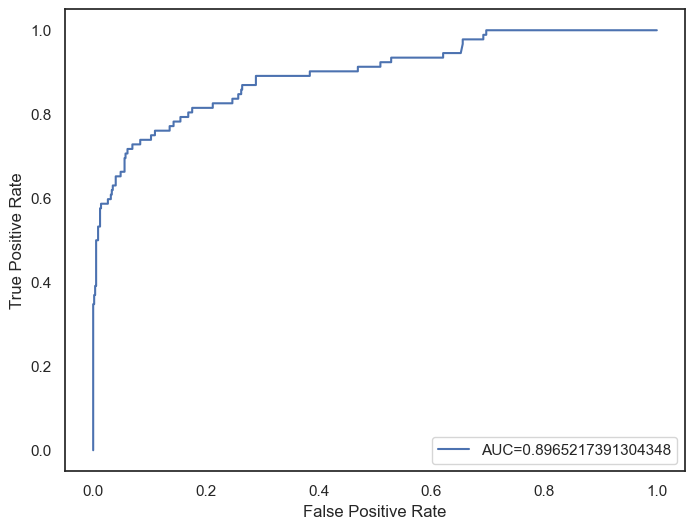

In [31]:
evaluate_model(tree_model, y_test, y_pred_rf)